In [1]:
import numpy as np
import pickle

In [2]:
scene_path = "benchmark_data/N10_M4_ends2_seed3"

with open(scene_path, 'rb') as file:
    data = pickle.load(file)
START_locs = data["START_locs"].cpu().detach().numpy()
F_base = data["F_base"].cpu().detach().numpy()
END_locs = data["END_locs"].cpu().detach().numpy()
num_agents = START_locs.shape[0]
num_nodes = F_base.shape[-2]
dim_ = F_base.shape[-1]
T = num_nodes + 1;

In [5]:
from matplotlib import pyplot as plt
# plotting the START_locs, END_locs, and F_base
plt.figure(figsize=(10, 6))
plt.scatter(START_locs[:, 1, 0], START_locs[:, 1, 1], c='blue', label='Start Locations', marker='o')
plt.scatter(END_locs[:, 0], END_locs[:, 1], c='red', label='End Locations', marker='x')
for i in range(num_agents): 
    plt.plot(F_base[i, :, 0], F_base[i, :, 1], label=f'Agent {i+1} Path', linestyle='--')
plt.title('Agent Paths and Locations')
plt.xlabel('X Coordinate')

IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 1000x600 with 0 Axes>

In [3]:
from GurobiSolver import SolveMIP

gap = 0.01
best_y, best_eta, cost, elapsed_time = SolveMIP(
    START_locs, END_locs, num_agents, num_nodes, T, dim_, F_base, gap=gap
)

Set parameter Username
Academic license - for non-commercial use only - expires 2026-07-28
Read LP format model from file C:\Users\salar\AppData\Local\Temp\tmpagr3gq89.pyomo.lp
Reading time = 0.00 seconds
x1: 136 rows, 408 columns, 548 nonzeros
Set parameter NonConvex to value 2
Set parameter MIPGap to value 0.01
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11+.0 (26100.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13620H, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 136 rows, 408 columns and 548 nonzeros
Model fingerprint: 0xda968c46
Model has 150 quadratic constraints
Variable types: 158 continuous, 250 integer (250 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [2e-01, 1e+00]
  Objective range  [1e-01, 1e-01]
  Bounds range     [5e-02, 1e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [8e-02, 1

In [6]:
print("Best y:", best_y)
print("Best eta:", best_eta)
print("Cost:", cost)
print("Elapsed time:", elapsed_time)

Best y: [[0.5027801  0.33358121]
 [0.59879445 0.30835901]
 [0.71553494 0.24699215]
 [0.83227579 0.18562672]]
Best eta: [[[0. 1. 0. 0. 0.]
  [1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 1. 0. 0. 0.]
  [1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 1. 0. 0. 0.]
  [1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 1. 0.]
  [0. 0. 1. 0. 0.]
  [0. 1. 0. 0. 0.]
  [1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 1. 0.]
  [0. 0. 1. 0. 0.]
  [0. 1. 0. 0. 0.]
  [1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 1. 0.]
  [0. 0. 1. 0. 0.]
  [0. 1. 0. 0. 0.]
  [1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 1. 0.]
  [0. 0. 1. 0. 0.]
  [0. 1. 0. 0. 0.]
  [1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 1. 0.]
  [0. 0. 1. 0. 0.]
  [0. 1. 0. 0. 0.]
  [1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1.]]

 [[1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[1. 0.

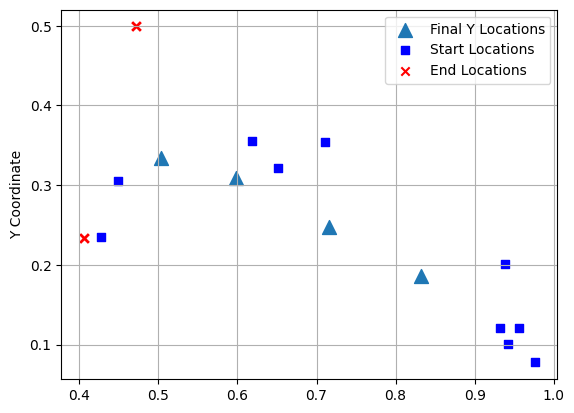

In [16]:
# plot final y
plt.scatter(best_y[:, 0], best_y[:, 1], marker = '^', label='Final Y Locations', s=100)
plt.scatter(START_locs[:, 0, 0], START_locs[:, 0, 1], c='blue', marker='s', label='Start Locations')
plt.scatter(END_locs[:, 0, 0], END_locs[:, 0, 1], c='red', marker='x', label='End Locations')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid()
plt.show()

In [17]:
# save the results using pickle
results = {
    "best_y": best_y,
    "best_eta": best_eta,
    "cost": cost,
    "elapsed_time": elapsed_time
}
with open("benchmark_results_Gurobi.pkl", "wb") as f:
    pickle.dump(results, f)
print("Results saved to benchmark_results_Gurobi.pkl")

Results saved to benchmark_results_Gurobi.pkl
